In [2]:
!pip install opencv-python-headless

In [ ]:

print("vit_h (8939.pth): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth")
print("Official GitHub: https://github.com/facebookresearch/segment-anything#model-checkpoints")

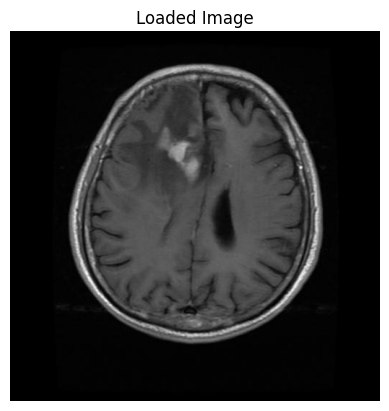

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

img_path = r"S:\Project\PCOS\archive\Training\glioma_tumor\gg (5).jpg"
if not os.path.exists(img_path):
    print(f"Error: File does not exist at {img_path}")
else:
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error: Could not load image at {img_path}")
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title("Loaded Image")
        plt.axis('off')
        plt.show()

Segmentation visualization saved to segmentation_output.png


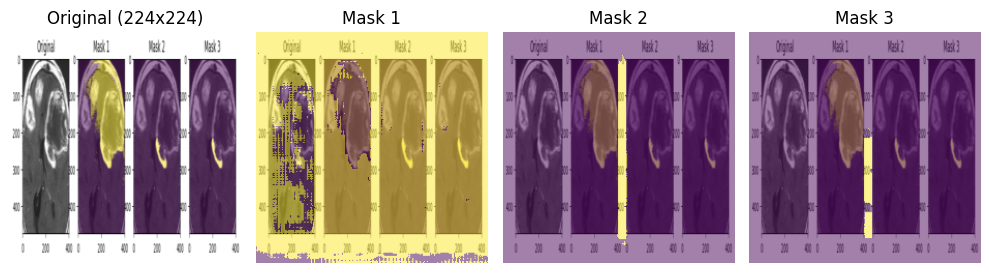

In [2]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor
import numpy as np
import cv2

# Define the image path and load the image
# This is a placeholder; you'll need to define your 'image' variable.
# For example:
image = cv2.imread(r'S:\Project\PCOS\archive\image.png') 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image_rgb is not None:
    # 1. Resize the image for a 224x224 resolution
    # You must convert the NumPy array to a PIL Image first for transforms.
    image_pil = Image.fromarray(image_rgb)
    resize_transform = transforms.Resize((224, 224))
    image_resized = np.array(resize_transform(image_pil))

    # Load SAM model (make sure to download the weights and set the correct path)
    sam = sam_model_registry["vit_b"](checkpoint=r"S:\Project\PCOS\archive\sam_vit_b_01ec64.pth")
    predictor = SamPredictor(sam)

    # Set the resized image for the predictor
    predictor.set_image(image_resized)

    # Select a point for segmentation (e.g., center of image)
    input_point = np.array([[image_resized.shape[1]//2, image_resized.shape[0]//2]])
    input_label = np.array([1])

    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # 2. Visualize the results at the new resolution
    # Create the figure with an appropriate size for 224x224 output
    fig, axes = plt.subplots(1, len(masks)+1, figsize=(10, 5))

    # Original Image (resized)
    axes[0].imshow(image_resized)
    axes[0].set_title("Original (224x224)")
    axes[0].axis('off')

    # Masks
    for i, mask in enumerate(masks):
        axes[i+1].imshow(image_resized)
        axes[i+1].imshow(mask, alpha=0.5)
        axes[i+1].set_title(f"Mask {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.savefig("segmentation_output.png")
    print("Segmentation visualization saved to segmentation_output.png")

Combined segmentation visualization saved to combined_segmentation_output.png


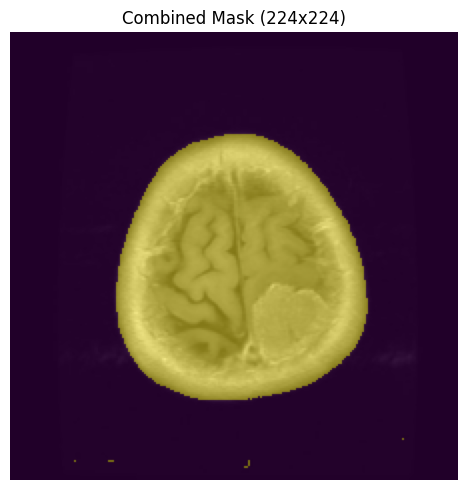

In [8]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor
import numpy as np
import cv2

# Define the image path and load the image
# Assuming 'image' is loaded elsewhere, e.g., from a file
image = cv2.imread(r'S:\Project\PCOS\archive\Training\meningioma_tumor\m (9).jpg') 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image_rgb is not None:
    # Resize the original image for a 224x224 resolution
    image_pil = Image.fromarray(image_rgb)
    resize_transform = transforms.Resize((224, 224))
    image_resized = np.array(resize_transform(image_pil))

    # Load SAM model
    sam = sam_model_registry["vit_b"](checkpoint=r"S:\Project\PCOS\archive\sam_vit_b_01ec64.pth")
    predictor = SamPredictor(sam)

    # Set the resized image for the predictor
    predictor.set_image(image_resized)

    # Select a point for segmentation (e.g., center of image)
    input_point = np.array([[image_resized.shape[1]//2, image_resized.shape[0]//2]])
    input_label = np.array([1])

    # Get the individual masks
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # 1. Combine all masks into a single composite mask
    combined_mask = np.zeros_like(masks[0], dtype=bool)
    for mask in masks:
        combined_mask = np.logical_or(combined_mask, mask)

    # 2. Create the final visualization at 224x224 resolution
    plt.figure(figsize=(5, 5)) # Set a square figure size for a square image
    plt.imshow(image_resized)
    plt.imshow(combined_mask, cmap='viridis', alpha=0.5) # Use a colormap for better visibility
    plt.title("Combined Mask (224x224)")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("combined_segmentation_output.png")
    print("Combined segmentation visualization saved to combined_segmentation_output.png")

Combined segmentation visualization saved to combined_segmentation_output.png


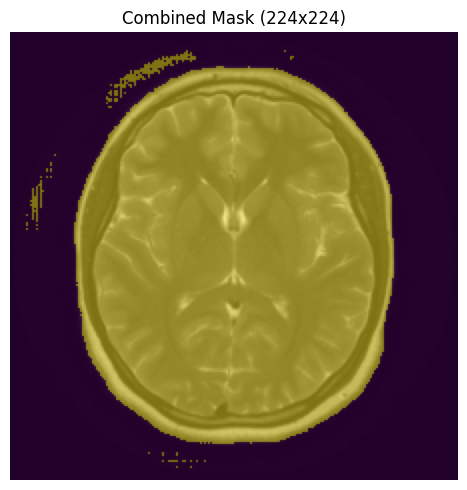

In [7]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor
import numpy as np
import cv2

# Define the image path and load the image
# Assuming 'image' is loaded elsewhere, e.g., from a file
image = cv2.imread(r'S:\Project\PCOS\archive\Training\no_tumor\image (13).jpg') 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image_rgb is not None:
    # Resize the original image for a 224x224 resolution
    image_pil = Image.fromarray(image_rgb)
    resize_transform = transforms.Resize((224, 224))
    image_resized = np.array(resize_transform(image_pil))

    # Load SAM model
    sam = sam_model_registry["vit_b"](checkpoint=r"S:\Project\PCOS\archive\sam_vit_b_01ec64.pth")
    predictor = SamPredictor(sam)

    # Set the resized image for the predictor
    predictor.set_image(image_resized)

    # Select a point for segmentation (e.g., center of image)
    input_point = np.array([[image_resized.shape[1]//2, image_resized.shape[0]//2]])
    input_label = np.array([1])

    # Get the individual masks
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # 1. Combine all masks into a single composite mask
    combined_mask = np.zeros_like(masks[0], dtype=bool)
    for mask in masks:
        combined_mask = np.logical_or(combined_mask, mask)

    # 2. Create the final visualization at 224x224 resolution
    plt.figure(figsize=(5, 5)) # Set a square figure size for a square image
    plt.imshow(image_resized)
    plt.imshow(combined_mask, cmap='viridis', alpha=0.5) # Use a colormap for better visibility
    plt.title("Combined Mask (224x224)")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("combined_segmentation_output2.png")
    print("Combined segmentation visualization saved to combined_segmentation_output.png")